GRIP Spark Foundation

Task-1 Marks prediction using Supervised Learning

Ippili.Mohith.Venkata.Sai.Krishna.Datta

Data Science and Business Analaytics Internship 

Predict the percentage of an student based on the no. of study hours.This is a simple linear regression task as it involves just 2 variables.Data can be found at http://bit.ly/w-data


In [ ]:
#importing needed libraries

In [21]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the data and showing the first 10 data 

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
print('Shape of the dataset: ', data.shape)
data.head(10)

Shape of the dataset is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#Checking for null values in the data set for cleaning

In [3]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
#getting the description of the dataset include mathematical things about the data in numeric

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#Now this tell all the info of the data set taken

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#plotting the data using the point plot

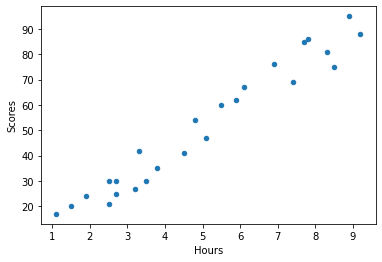

In [6]:
data.plot(kind='scatter', x='Hours', y='Scores')
plt.show()

In [ ]:
#Getting the correlation between the columns in pearson method

In [7]:
data.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
#Getting the correlation between the columns in spearman method

In [8]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [9]:
hours = data['Hours']
scores = data['Scores']

In [ ]:
#plotting the density plot of the hours

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

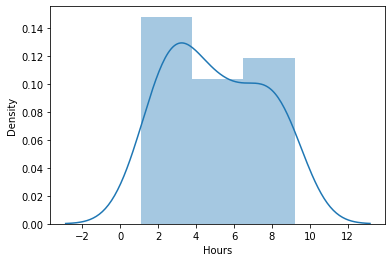

In [10]:
sns.distplot(hours)

In [ ]:
#plotting the density plot of the scores

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

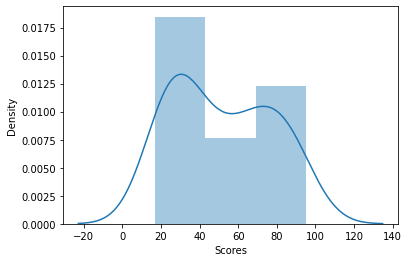

In [11]:

sns.distplot(scores)

Using linear Regression to predict

In [ ]:
#taking the values into variables

In [12]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [ ]:
#splitting the data to train and test the data

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [ ]:
#importing the linear regression model package and fit the data

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
#appling the linear functions to train the data to tha algo

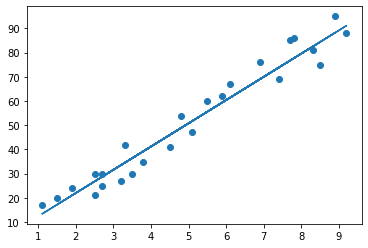

In [15]:
m=reg.coef_
c=reg.intercept_
line = m*x+c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [ ]:
#now predicting the test data set with the trained model

In [16]:
y_pred = reg.predict(x_test)

In [ ]:
#these are the predicted scores with the actual scores

In [17]:
actual_predicted = pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


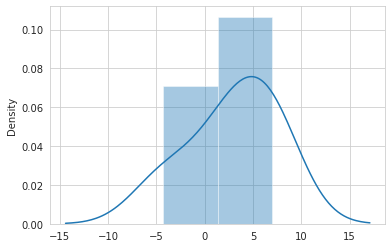

In [18]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

In [ ]:
#examin the model with own data to the model

In [19]:
h=9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {}% in exams.".format(h,s))

If a student studies for 9.25 hours per day he/she will score [91.56986604]% in exams.


In [ ]:
#this the prediction percentage about how correct the model is predicting the marks according to the hours

In [20]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942


In [ ]:
# for this we got 97.1% accurate model and also be increase by training the model with more data as training